## Linear Regression

### Step 1: Import the libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Demos/demo2_data.csv')

### Step 2:  Identifying the dependent and independent variable 

In [3]:
data

NameError: name 'data' is not defined

### Converting categorical data into numerical data

In [4]:
data.waterfront = data.waterfront.map({'Yes':1, 'No' : 0})

NameError: name 'data' is not defined

In [7]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


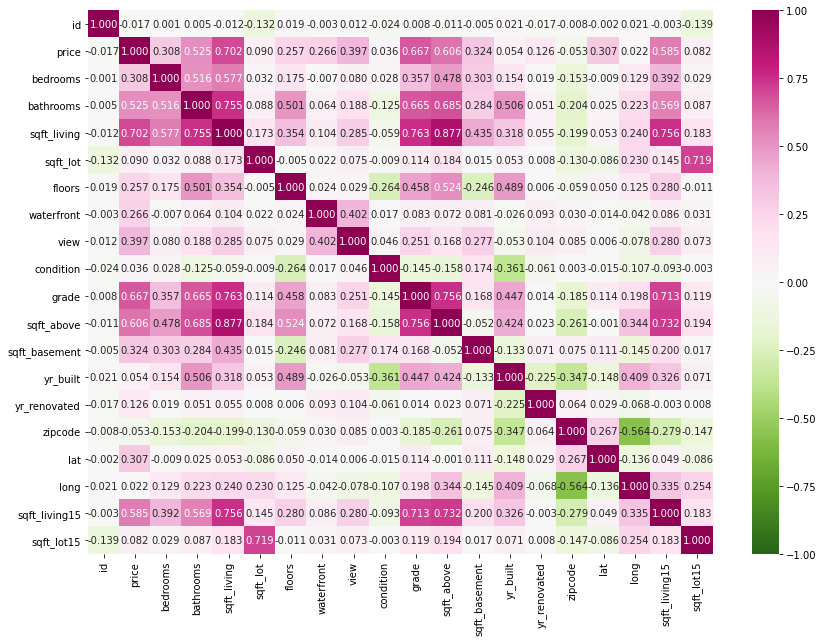

In [8]:
corrs = data.corr()
plt.figure(figsize = (14, 10))
sbn.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

In [9]:
standard_scaler =  StandardScaler()
minmax_scaler = MinMaxScaler()

In [10]:
x = data.iloc[:, 2:]  #selecting all columns except "price"
y = data.iloc[:, 1:2] #selecting target(price in this case)

In [10]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


###  Step 3: Splitting the dataset into the Training set(80%)  and the Test set(20%)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [17]:
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.fit_transform(X_test)

In [18]:
X_train

array([[-0.42508016, -0.47848587,  0.09116317, ..., -0.13533044,
         0.26244154, -0.21642478],
       [-0.42508016,  0.47210899,  0.27585159, ..., -1.08443921,
        -0.58016133, -0.32431681],
       [-1.51955396, -1.42908072, -0.89384171, ..., -0.56030452,
        -0.55159852, -0.34781417],
       ...,
       [-0.42508016, -0.47848587, -0.13456711, ...,  1.42290785,
         0.66232087,  0.93972353],
       [-0.42508016,  0.15524404, -0.12430664, ..., -1.0348589 ,
        -0.63728695, -0.13477146],
       [ 1.76386745,  2.37329869,  1.70205658, ...,  0.21173173,
         2.04761711,  0.877808  ]])

### Step 4: Training the Multi Linear Regression model on the Training set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [20]:
print(y_pred)
print(len(y_pred))

[[ 640228.79439134]
 [ 476662.07784786]
 [ 707885.43656342]
 ...
 [ 360580.04243352]
 [1388381.82750088]
 [ 367812.10887544]]
4323


In [21]:
out =y_test.to_numpy()
print(out)
print(len(out))

[[ 459000.]
 [ 445000.]
 [1060000.]
 ...
 [ 260000.]
 [1800000.]
 [ 418000.]]
4323


### Step 5: Check accuracy of the result

In [22]:
 from sklearn.metrics import r2_score
r2_score(out, y_pred)

0.6859494140091065

### For understanding the concept

In [23]:
## example of r2_score
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679